In [11]:
import numpy, loompy
import matplotlib.pyplot as plt

replicates_looms = [ \
    [ ['M99'], 'adata_meningioma_M99.loom'], \
    [ ['M73b'], 'adata_meningioma_M73.loom'], \
    [ ['M89b'], 'adata_meningioma_M89.loom'], \
    [ ['M46'], 'adata_meningioma_M46.loom'], \
    #[ ['M99','M73b','M89b','M46'], 'adata_meningioma.loom'], \
    [ ['M108'], 'adata_M108_all_leiden.loom'], \
    [ ['M47'], 'adata_M47_all_leiden.loom'], \
    [ ['SL123'], 'adata_SL123_all_leiden.loom'] ]

ntopics = 35
nbins = 40
samples = []
for rl in replicates_looms:
    samples.extend(rl[0])
nsamples = len(samples)
means = numpy.zeros([ntopics, nsamples])
histos = numpy.zeros([ntopics, nsamples, nbins])

sampleidx = 0
for rl in replicates_looms:
    replicates, loom = rl
    with loompy.connect(loom, 'r') as ds:
        for r in replicates:
            scores = ds.ca.TP_35_Recombined3Clean2_C_FBPC[ds.ca.replicate == r] if 'replicate' in ds.ca \
                     else ds.ca.TP_35_Recombined3Clean2_C_FBPC
            print(loom, r, scores.shape)
            for topicidx in range(ntopics):
                means[topicidx, sampleidx] = numpy.mean(scores[:,topicidx])
                histos[topicidx, sampleidx,:] = numpy.histogram(scores[:,topicidx], bins=nbins, range=(0,1))[0]
            sampleidx += 1


adata_meningioma_M99.loom M99 (177771, 35)
adata_meningioma_M73.loom M73b (106609, 35)
adata_meningioma_M89.loom M89b (191943, 35)
adata_meningioma_M46.loom M46 (83430, 35)
adata_M108_all_leiden.loom M108 (96699, 35)
adata_M47_all_leiden.loom M47 (86488, 35)
adata_SL123_all_leiden.loom SL123 (203193, 35)


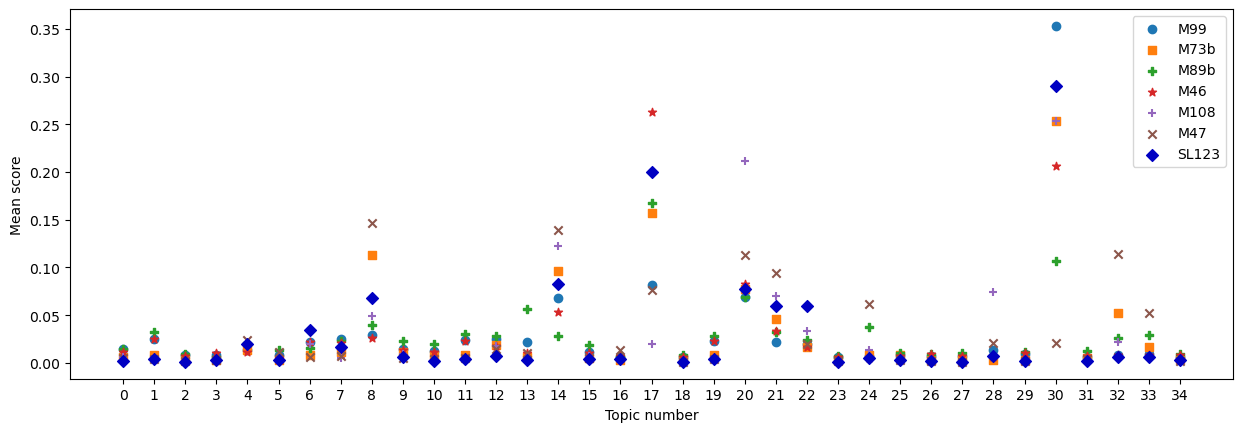

In [12]:
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#0000c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = ['o', 's', 'P', '*', '+', 'x', 'D', 'H']

fig, ax = plt.subplots()
for sampleidx in range(nsamples):
    ax.scatter(range(ntopics), means[:,sampleidx], c=colors[sampleidx], marker=markers[sampleidx])

fig.set_figwidth(15)
plt.xlabel('Topic number')
plt.ylabel('Mean score')
plt.xticks(numpy.arange(0, ntopics))
ax.legend(samples)
plt.show()

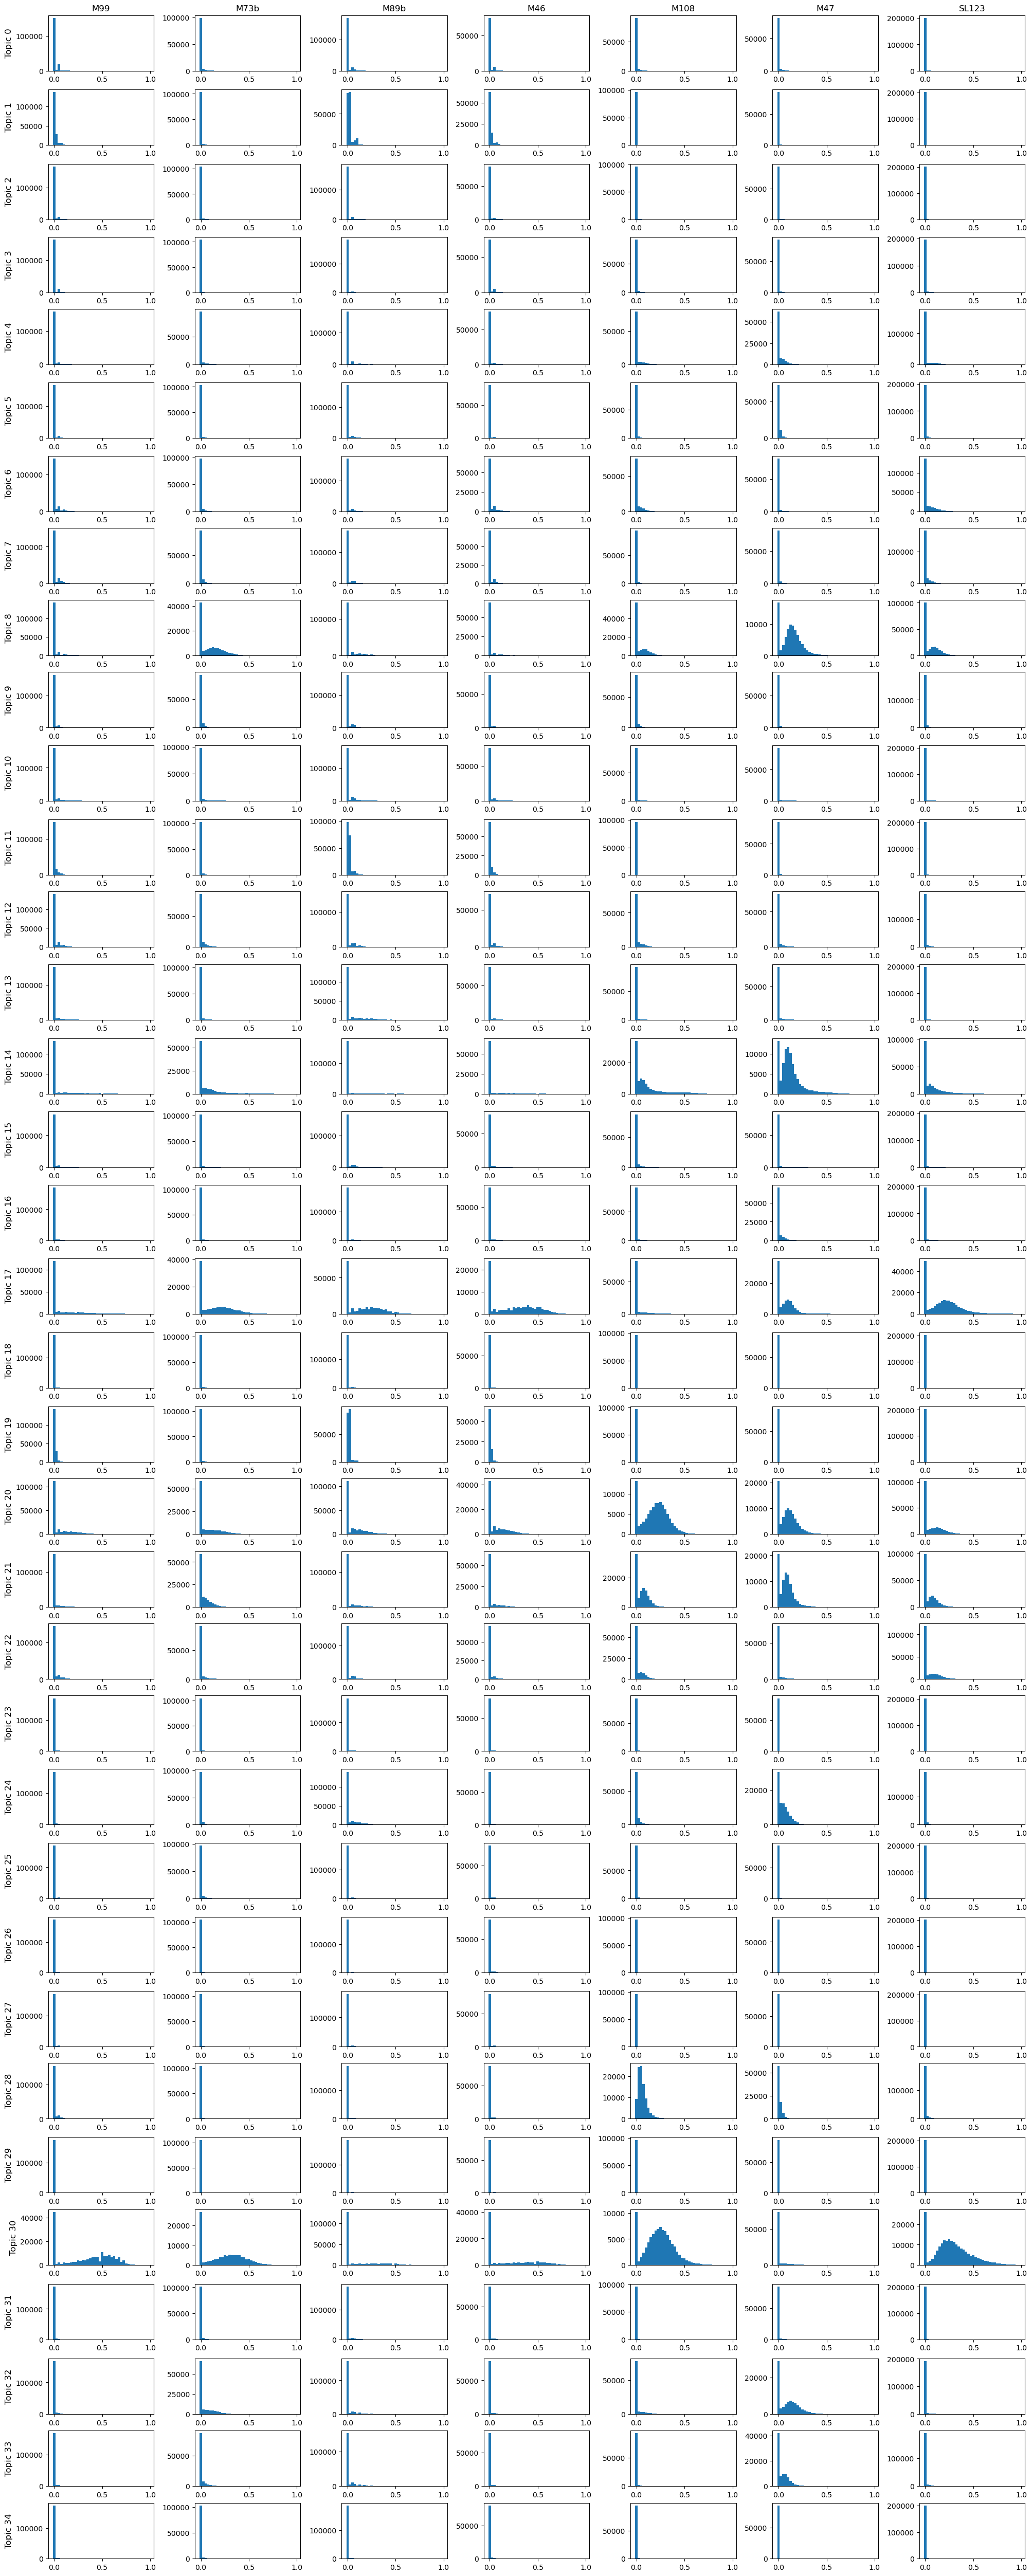

In [13]:
fig, axs = plt.subplots(ntopics, nsamples, layout="constrained")
for topicidx in range(ntopics):
    axs[topicidx,0].set_ylabel('Topic %s' % topicidx, size='large')
for sampleidx, sample in enumerate(samples):
    axs[0,sampleidx].set_title(sample, size='large')
    for topicidx in range(ntopics):
        axs[topicidx, sampleidx].bar(numpy.arange(0.0,1.0,1.0/nbins), histos[topicidx, sampleidx,:], width=1.0/nbins)

fig.set_size_inches(20, 50)
plt.show()

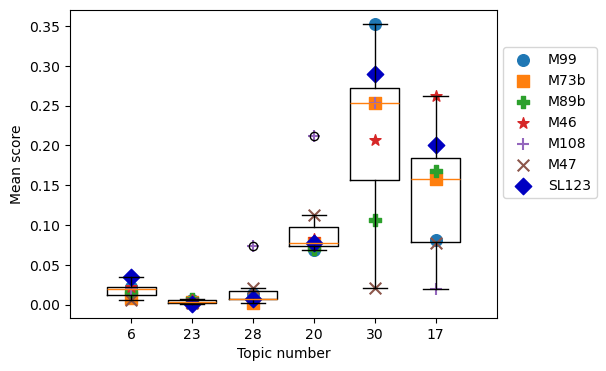

In [15]:
fig, ax = plt.subplots(figsize=(5.5, 4))

selection = numpy.array([6, 23, 28, 20, 30, 17])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#0000c2', '#7f7f7f', '#bcbd22', '#17becf']
markers = ['o', 's', 'P', '*', '+', 'x', 'D', 'H']
n = len(selection)
nsamples = 7 
sm = numpy.zeros([n, nsamples])

position_scale = 0.5
positions = numpy.arange(n) * position_scale

for sampleidx in range(nsamples):
    m = means[:,sampleidx]
    selected_means = m[selection]
    sm[:,sampleidx] = selected_means 
    ax.scatter(positions, selected_means, c=colors[sampleidx % len(colors)], marker=markers[sampleidx % len(markers)], s=70)

ax.boxplot(sm.T, positions=positions, widths=0.4)
plt.xlabel('Topic number')
plt.ylabel('Mean score')
plt.xticks(positions, selection)
ax.legend(samples, bbox_to_anchor=(1, 0.9))
#plt.savefig('topics_XmenO_boxplot.pdf',dpi=300)
plt.show()